In [9]:
using Graphs, MetaGraphsNext
W = [0 1 2; 1 0 3; 2 3 0]


3×3 Matrix{Int64}:
 0  1  2
 1  0  3
 2  3  0

In [12]:
g = SimpleGraph(W)
mg = MetaGraph(g)
mg[1,2]

LoadError: UndefKeywordError: keyword argument `label_type` not assigned

In [15]:
C = [4 8 5; 2 1 9; 6 3 7]
i,j = Tuple(argmin(C))


(2, 2)

In [16]:
C = [4 8 5; 2 1 9; 6 3 7]            # Need to re-define matrix since it was changed above
function greedyassignment(C)
    C = copy(C)                      # Copy-by-value instead of default copy-by-reference
    X = zeros(size(C))
    M = maximum(C) + 1               # Large value so that assignment not made again
    for i = 1:size(C,2)
        idx = argmin(C)
        X[idx] = 1
        C[idx[1],:] .= M
        C[:,idx[2]] .= M
    end
    return X
end
X = greedyassignment(C)

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

In [30]:
using SimpleWeightedGraphs
using Graphs  # Graphs.jl (used with SimpleWeightedGraphs)

# Define src, destination, and weight vectors
src = [1, 1, 2, 3]
dst = [2, 3, 3, 4]
wt = [0.5, 1.5, 2.0, 3.0]

# Create a SimpleWeightedGraph directly from src, dst, and wt
g = SimpleWeightedGraph(src, dst, wt)

# Print the adjacency matrix of the graph to verify
adjacency_matrix(g)
get_weight(g,1,2)
g.weights[1,2]

0.5

In [31]:
kruskal_mst(g)

3-element Vector{SimpleWeightedEdge{Int64, Float64}}:
 Edge 1 => 2 with weight 0.5
 Edge 1 => 3 with weight 1.5
 Edge 3 => 4 with weight 3.0

In [121]:
using Graphs, MetaGraphsNext

mg = MetaGraph(Graph(); 
    label_type=Int, 
    edge_data_type=Float64,
    weight_function=e->e,
    default_weight=Inf)

Meta graph based on a SimpleGraph{Int64} with vertex labels of type Int64, vertex metadata of type Nothing, edge metadata of type Float64, graph metadata given by nothing, and default weight Inf

In [16]:
using Graphs, MetaGraphsNext

function geograph(IJW)
    g = MetaGraph(Graph(); 
        label_type=Int,
        vertex_data_type=Nothing,
        edge_data_type=Float64,
        weight_function=e->e,
        default_weight=Inf)

    for i in unique(IJ[:,1:2])
        g[Int(i)] = nothing
    end

    for r in eachrow(IJW)
        g[Int(r[1]), Int(r[2])] = r[3]
    end
    return g
end

geograph (generic function with 2 methods)

In [23]:
using Graphs, MetaGraphsNext

function geograph(IJW)
    g = MetaGraph(Graph(); 
        label_type=Int,
        vertex_data_type=Nothing,
        edge_data_type=Float64,
        weight_function=e->e,
        default_weight=Inf)

    for i in unique(IJ[:,1:2])
        add_vertex!(g, Int(i))
    end

    for r in eachrow(IJW)
        add_edge!(g, Int(r[1]), Int(r[2]), r[3])
    end
    return g
end

geograph (generic function with 2 methods)

In [24]:
IJW = [1 2 3.0; 1 3 4.0]
g = geograph(IJW)

Meta graph based on a SimpleGraph{Int64} with vertex labels of type Int64, vertex metadata of type Nothing, edge metadata of type Float64, graph metadata given by nothing, and default weight Inf

In [25]:
W = weights(g)

MetaWeights of size (3, 3)

In [26]:
g[1,2]

3.0

In [28]:
kruskal_mst(g)

2-element Vector{Graphs.SimpleGraphs.SimpleEdge{Int64}}:
 Edge 1 => 2
 Edge 1 => 3

In [81]:
k = collect(vertices(g))
nv(g)

4

In [113]:
for v in vertices(g)
    mg[v] = nothing
end

In [114]:
for e in edges(g)
    mg[e.src,e.dst] = e.weight
    #println(e.src,e.dst,e.weight)
end
mg[1,4] = 0.0

0.0

In [118]:
W = weights(mg)
W[1,4]

0.0

In [115]:
adjacency_matrix(mg)

4×4 SparseArrays.SparseMatrixCSC{Int64, Int64} with 10 stored entries:
 ⋅  1  1  1
 1  ⋅  1  ⋅
 1  1  ⋅  1
 1  ⋅  1  ⋅

In [116]:
for e in edges(mg)
    println(e)
end

Edge 1 => 2
Edge 1 => 3
Edge 1 => 4
Edge 2 => 3
Edge 3 => 4


In [94]:
gg=mg
for v in vertices(gg)
    println(v)
    println(label_for(gg,v))
end
for e in edges(gg)
    println(e)
end
for e in edge_labels(gg)
    println(e)
    println(gg[e[1],e[2]])
end

1
1
2
2
3
3
4
4
Edge 1 => 2
Edge 1 => 3
Edge 2 => 3
Edge 3 => 4
(1, 2)
0.5
(1, 3)
1.5
(2, 3)
2.0
(3, 4)
3.0


In [85]:
using DataFrames, Graphs

df_links = DataFrame(src = [1, 2, 3, 4, 6],
                     dst = [2, 3, 4, 6, 1])

df_nodes = DataFrame(idx = [1, 2, 3, 5, 6],
                     x = [0.1, 0.5, 0.3, 0.9, 0.1],
                     y = [0.4, 0.7, 0.2, 0.6, 0.2])

function prune_reindex(df_links::DataFrame, df_nodes::DataFrame)
    # Find vertices common to df_links and df_nodes
    vtx = intersect(union(df_links[:, 1], df_links[:, 2]), df_nodes[:, 1])

    # Prune rows in df_links and df_nodes based on common vertices
    df_links_out = filter(row -> (row[1] in vtx) && (row[2] in vtx), df_links)
    df_nodes_out = filter(row -> row[1] in vtx, df_nodes)

    # Create mapping and reindex src (col 1) and dst (col 2)
    vtx_map = Dict(v => i for (i, v) in enumerate(vtx))
    for row in eachrow(df_links_out)
        row[1] = vtx_map[row[1]]
        row[2] = vtx_map[row[2]]
    end

    # Reindex idx (col 1)
    df_nodes_out[:, 1] = 1:nrow(df_nodes_out)
    
    return df_links_out, df_nodes_out
end
prune_reindex(df_links, df_nodes)

(3×2 DataFrame
 Row │ src    dst   
     │ Int64  Int64 
─────┼──────────────
   1 │     1      2
   2 │     2      3
   3 │     4      1, 4×3 DataFrame
 Row │ idx    x        y       
     │ Int64  Float64  Float64 
─────┼─────────────────────────
   1 │     1      0.1      0.4
   2 │     2      0.5      0.7
   3 │     3      0.3      0.2
   4 │     4      0.1      0.2)

In [52]:
g = SimpleGraph(length(vtx))
vtx_map = Dict(node => idx for (idx, node) in enumerate(df_nodes_filtered.node_id))

Dict{Int64, Int64} with 4 entries:
  6 => 4
  2 => 2
  3 => 3
  1 => 1

In [57]:
NormEdge(s,d) = Edge(min(s,d), max(s,d))
edge_to_row_map = Dict{Edge{Int}, Int}()
for row in eachrow(df_links_filtered)
    src_idx = vtx_map[row.src]
    dst_idx = vtx_map[row.dst]
    add_edge!(g, src_idx, dst_idx)
    edge_to_row_map[NormEdge(src_idx, dst_idx)] = row.row_index
end
edge_to_row_map

Dict{Graphs.SimpleGraphs.SimpleEdge{Int64}, Int64} with 3 entries:
  Edge 1 => 2 => 1
  Edge 1 => 4 => 5
  Edge 2 => 3 => 2

In [54]:
node_to_row_array = collect(keys(vtx_map))[sortperm(collect(values(vtx_map)))]

4-element Vector{Int64}:
 1
 2
 3
 6

In [58]:
for e in edges(g)
    println("$e => Row in df_links: ", edge_to_row_map[e])
    println(e)
end
for v in vertices(g)
    println("Vertex $v => Row in df_nodes: ", node_to_row_array[v])
    println(v)
end

Edge 1 => 2 => Row in df_links: 1
Edge 1 => 2
Edge 1 => 4 => Row in df_links: 5
Edge 1 => 4
Edge 2 => 3 => Row in df_links: 2
Edge 2 => 3
Vertex 1 => Row in df_nodes: 1
1
Vertex 2 => Row in df_nodes: 2
2
Vertex 3 => Row in df_nodes: 3
3
Vertex 4 => Row in df_nodes: 6
4


In [47]:
# Create a graph and add edges
g = SimpleGraph(3)
add_edge!(g, 2, 1)
add_edge!(g, 3, 1)

# Create a dictionary using edges as keys
dict = Dict{Edge{Int}, Int}()

# Add values using edges
for e in edges(g)
    dict[e] = e.src + e.dst  # Example: sum of the edge's vertices
end

# Access the edge values
NEdge(s,d) = Edge(min(s,d), max(s,d))
println(dict[NEdge(1, 2)])  # Outputs the sum of vertices 1 and 2
println(dict[NEdge(2, 1)])  # Same as above, normalized to (1, 2)


3
3


In [132]:
using DataFrames

function prune_reindex(df_links::DataFrame, df_nodes::DataFrame)
    # Find vertices common to df_links and df_nodes
    vtx = intersect(union(df_links[:, 1], df_links[:, 2]), df_nodes[:, 1])

    # Prune rows in df_links and df_nodes based on common vertices
    df_links_out = filter(row -> (row[1] in vtx) && (row[2] in vtx), df_links)
    df_nodes_out = filter(row -> row[1] in vtx, df_nodes)

    # Create mapping and reindex src (col 1) and dst (col 2)
    vtx_map = Dict(v => i for (i, v) in enumerate(vtx))
    for row in eachrow(df_links_out)
        row[1] = vtx_map[row[1]]
        row[2] = vtx_map[row[2]]
    end

    # Reindex idx (col 1)
    df_nodes_out[:, 1] .= [vtx_map[row[1]] for row in eachrow(df_nodes_out)]
    sort!(df_nodes_out, 1)
    
    return df_links_out, df_nodes_out
end

prune_reindex (generic function with 2 methods)

In [ ]:
    #df_nodes_out[:, 1] = 1:nrow(df_nodes_out)
    idx = []
    for i = 1:nrow(df_nodes_out)
        push!(idx, vtx_map[df_nodes_out[i, 1]])
    end
    df_nodes_out[:, 1] = idx
    sort!(df_nodes_out, 1)

In [120]:
df_links = DataFrame(src = [1, 2, 3, 4, 6],
                     dst = [2, 3, 4, 6, 1])

df_nodes = DataFrame(idx = [1, 2, 3, 5, 6],
                     x = [0.1, 0.5, 0.3, 0.9, 0.1],
                     y = [0.4, 0.7, 0.2, 0.6, 0.2])

L,N,v = prune_reindex(df_links, df_nodes)

(3×2 DataFrame
 Row │ src    dst   
     │ Int64  Int64 
─────┼──────────────
   1 │     1      2
   2 │     2      3
   3 │     4      1, 4×3 DataFrame
 Row │ idx    x        y       
     │ Int64  Float64  Float64 
─────┼─────────────────────────
   1 │     1      0.1      0.4
   2 │     2      0.5      0.7
   3 │     3      0.3      0.2
   4 │     4      0.1      0.2, [1, 2, 3, 6])

In [121]:
using DataFrames, CSV

dfnodes = DataFrame(CSV.File("nhs_nodes.csv"))
dflinks = DataFrame(CSV.File("nhs_links.csv"))
dfnodes, dflinks

In [133]:
dfL, dfN = prune_reindex(
    filter(r -> (r.STFIP == 37) && (r.COFIP == 183), dflinks), dfnodes)

(446×10 DataFrame
 Row │ SRC    DST    DIST      STFIP  COFIP  URBAN  SPEED    SIGN      NAME    ⋯
     │ Int64  Int64  Float64   Int64  Int64  Int64  Float64  String7?  String? ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     1      2  0.361991     37    183  73261     70.0  I40       missing ⋯
   2 │     1    220  3.11067      37    183  73261     70.0  I40       missing
   3 │     2    305  1.09278      37    183  73261     55.0  U70       Us Hwy
   4 │     2    306  0.446956     37    183  73261     70.0  I40       missing
   5 │     3      4  3.39827      37    183  99999     70.0  U1        missing ⋯
   6 │     4     54  3.85514      37    183  73261     70.0  U1        missing
   7 │     5     11  0.462193     37    183  73261     55.0  U401      missing
   8 │     5     27  0.972324     37    183  73261     55.0  U401      missing
   9 │     6     11  0.798938     37    183  73261     55.0  U401      missing ⋯
  10 │     6    122  1.

In [115]:
kk = [11,12,14,13,16,15]

6-element Vector{Int64}:
 11
 12
 14
 13
 16
 15

In [116]:
k = [1,2,4,3,6,5]
kk[sortperm(k)]

6-element Vector{Int64}:
 11
 12
 13
 14
 15
 16

In [214]:
using Graphs, SimpleWeightedGraphs

g = SimpleWeightedGraph(dfL2.SRC, dfL2.DST, dfL2.DIST)


{419, 451} undirected simple Int64 graph with Float64 weights

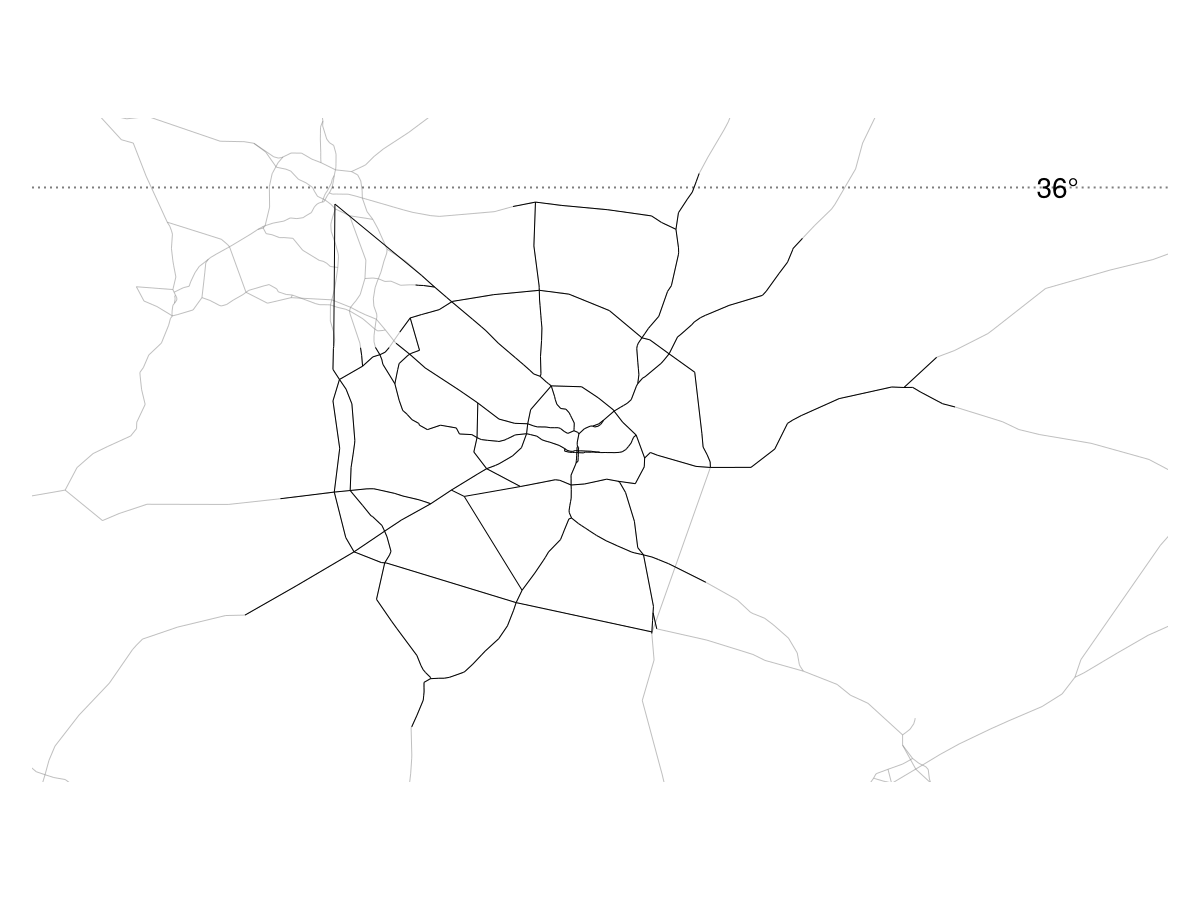

In [215]:
using CairoMakie, Logjam.MapTools

function plotroads(g, x, y)
    fig, ax = makemap(x, y; doRoadbkgd=true)
    x2ln(g, x) = vcat(map(e -> [x[src(e)], x[dst(e)], NaN], edges(g))...)
    h = lines!(ax, x2ln(g, x), x2ln(g, y), color=:black, linewidth=.5)
    return fig, ax, h
end

fig, ax, h = plotroads(g, dfN2.LON, dfN2.LAT);
#scatter!(ax, dfN.LON[t], dfN.LAT[t], marker='.', markersize=24, color=:red)
#scatter!(ax, pt[1],pt[2])
fig

In [176]:
using DelaunayTriangulation

x′ = [-78.75864529722959, -78.89102103222592]
y′ = [35.74329140697632, 35.9862421784149]

pt = (-78.75864529722959, 35.74329140697632)
pt = [-78.89102103222592, 35.9862421784149]

tri = triangulate(collect(zip(dfN.LON, dfN.LAT)))
t = brute_force_search(tri, pt)
t = filter(x -> x > 0, t)

(376, 352)

In [213]:
using DelaunayTriangulation

function dgc(xy₁, xy₂; unit=:mi)
    length(xy₁) == length(xy₂) == 2 || error("Inputs must have length 2.")
    unit in [:mi, :km] || error("Unit must be :mi or :km")

    Δx, Δy = xy₂[1] - xy₁[1], xy₂[2] - xy₁[2]
    a = sind(Δy / 2)^2 + cosd(xy₁[2]) * cosd(xy₂[2]) * sind(Δx / 2)^2
    2 * asin(min(sqrt(a), 1.0)) * (unit == :mi ? 3958.75 : 6371.00)
end
Dgc(X₁, X₂) = [dgc(i, j) for i in eachrow(X₁), j in eachrow(X₂)]

function addconnectors(dfL, dfN, x′, y′)
    g = 1.3   # Interior circuity factor
    n = length(x′)
    b, e, d = dfL[:, 1], dfL[:, 2], dfL[:, 3]
    idx, x, y = dfN[:, 1], dfN[:, 2], dfN[:, 3]
    tri = triangulate(collect(zip(x, y)))
    b′, e′, d′ = Int[], Int[], Float64[]
    for i = 1:n
        t = brute_force_search(tri, (x′[i], y′[i]))
        t = filter(x -> x > 0, t)
        dᵢ = [g*dgc((x′[i], y′[i]), (x[j], y[j])) for j in t]
        for (j,k) in enumerate(t)
            push!(b′, i)
            push!(e′, k + n)
            push!(d′, dᵢ[j]) 
        end
    end
    b .+= n
    append!(b, b′)
    e .+= n
    append!(e, e′)
    append!(d, d′)
    idx .+= n
    prepend!(idx, 1:n)
    prepend!(x, x′)
    prepend!(y, y′)
    dfLout = DataFrame(Symbol(names(dfL)[1]) => b, Symbol(names(dfL)[2]) => e, 
        Symbol(names(dfL)[3]) => d)
    dfNout = DataFrame(Symbol(names(dfN)[1]) => idx, Symbol(names(dfN)[2]) => x, 
        Symbol(names(dfN)[3]) => y)
    return dfLout, dfNout
end
dfL2, dfN2 = addconnectors(dfL, dfN, x′, y′)

(451×3 DataFrame
 Row │ SRC    DST    DIST      
     │ Int64  Int64  Float64   
─────┼─────────────────────────
   1 │     3      4   0.361991
   2 │     3    222   3.11067
   3 │     4    307   1.09278
   4 │     4    308   0.446956
   5 │     5      6   3.39827
   6 │     6     56   3.85514
   7 │     7     13   0.462193
   8 │     7     29   0.972324
   9 │     8     13   0.798938
  10 │     8    124   1.25214
  11 │     9     10   1.60154
  ⋮  │   ⋮      ⋮        ⋮
 442 │   304    305   0.701596
 443 │   305    418   2.59257
 444 │   305    419   0.507954
 445 │   306    417   1.43788
 446 │   306    419   0.541973
 447 │     1      8   8.24161
 448 │     1    121   4.25563
 449 │     1     73   1.07142
 450 │     2    378   8.38067
 451 │     2    354  10.6393
               430 rows omitted, 419×3 DataFrame
 Row │ IDX    LON       LAT     
     │ Int64  Float64   Float64 
─────┼──────────────────────────
   1 │     1  -78.7586  35.7433
   2 │     2  -78.891   35.9862
   3 │     

In [204]:
@doc prepend!

```
prepend!(a::Vector, collections...) -> collection
```

Insert the elements of each `collections` to the beginning of `a`.

When `collections` specifies multiple collections, order is maintained: elements of `collections[1]` will appear leftmost in `a`, and so on.

!!! compat "Julia 1.6"
    Specifying multiple collections to be prepended requires at least Julia 1.6.


# Examples

```jldoctest
julia> prepend!([3], [1, 2])
3-element Vector{Int64}:
 1
 2
 3

julia> prepend!([6], [1, 2], [3, 4, 5])
6-element Vector{Int64}:
 1
 2
 3
 4
 5
 6
```

```
prepend!(df::DataFrame, df2::AbstractDataFrame; cols::Symbol=:setequal,
         promote::Bool=(cols in [:union, :subset]))
prepend!(df::DataFrame, table; cols::Symbol=:setequal,
         promote::Bool=(cols in [:union, :subset]))
```

Add the rows of `df2` to the beginning of `df`. If the second argument `table` is not an `AbstractDataFrame` then it is converted using `DataFrame(table, copycols=false)` before being prepended.

The exact behavior of `prepend!` depends on the `cols` argument:

  * If `cols == :setequal` (this is the default) then `df2` must contain exactly the same columns as `df` (but possibly in a different order).
  * If `cols == :orderequal` then `df2` must contain the same columns in the same order (for `AbstractDict` this option requires that `keys(row)` matches `propertynames(df)` to allow for support of ordered dicts; however, if `df2` is a `Dict` an error is thrown as it is an unordered collection).
  * If `cols == :intersect` then `df2` may contain more columns than `df`, but all column names that are present in `df` must be present in `df2` and only these are used.
  * If `cols == :subset` then `append!` behaves like for `:intersect` but if some column is missing in `df2` then a `missing` value is pushed to `df`.
  * If `cols == :union` then `append!` adds columns missing in `df` that are present in `df2`, for columns present in `df` but missing in `df2` a `missing` value is pushed.

If `promote=true` and element type of a column present in `df` does not allow the type of a pushed argument then a new column with a promoted element type allowing it is freshly allocated and stored in `df`. If `promote=false` an error is thrown.

The above rule has the following exceptions:

  * If `df` has no columns then copies of columns from `df2` are added to it.
  * If `df2` has no columns then calling `prepend!` leaves `df` unchanged.

Please note that `prepend!` must not be used on a `DataFrame` that contains columns that are aliases (equal when compared with `===`).

Metadata: table-level `:note`-style metadata and column-level `:note`-style metadata for columns present in `df` are preserved. If new columns are added their `:note`-style metadata is copied from the appended table. Other metadata is dropped.

See also: use [`pushfirst!`](@ref) to add individual rows at the beginning of a data frame, [`append!`](@ref) to add a table at the end, and [`vcat`](@ref) to vertically concatenate data frames.

# Examples

```jldoctest
julia> df1 = DataFrame(A=1:3, B=1:3)
3×2 DataFrame
 Row │ A      B
     │ Int64  Int64
─────┼──────────────
   1 │     1      1
   2 │     2      2
   3 │     3      3

julia> df2 = DataFrame(A=4.0:6.0, B=4:6)
3×2 DataFrame
 Row │ A        B
     │ Float64  Int64
─────┼────────────────
   1 │     4.0      4
   2 │     5.0      5
   3 │     6.0      6

julia> prepend!(df1, df2);

julia> df1
6×2 DataFrame
 Row │ A      B
     │ Int64  Int64
─────┼──────────────
   1 │     4      4
   2 │     5      5
   3 │     6      6
   4 │     1      1
   5 │     2      2
   6 │     3      3
```


In [192]:
kk = DataFrame(src = [1, 2, 3, 4, 6],
                     dst = [2, 3, 4, 6, 1])
vcat(kk.src,kk.src)

10-element Vector{Int64}:
 1
 2
 3
 4
 6
 1
 2
 3
 4
 6

In [ ]:
append!(b .+ n, b′)
append!(e .+ n, e′)
append!(d, d′)
prepend!(1:n, idx)
prepend!(x′, x)
prepend!(y′, y)

In [23]:
using Logjam.DataTools, DataFrames, CSV

#df = filter(r -> (r.STFIP == st2fips(:FL)) && (r.POP > 100_000), usplace())
df = uscsa()
idx=sortperm(df.POP, rev=true)[1:15]
df[sortperm(df.POP, rev=true)[1:15],:]
df = first(sort(uscsa(), :POP, rev=true), 15)

Row,CSA,NAME,LAT,LON,POP,ALAND,AWATER
,Int64,String?,Float64,Float64,Int64,Float64,Float64
1,408,"New York-Newark, NY-NJ-CT-PA",40.7586,-73.9732,21485506,10609.1,2652.94
2,348,"Los Angeles-Long Beach, CA",33.9981,-117.959,18644680,33970.2,1343.92
3,548,"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA",39.0344,-77.0679,10028331,13200.6,2014.1
4,176,"Chicago-Naperville, IL-IN-WI",41.855,-87.8729,9986960,10633.9,2433.03
5,488,"San Jose-San Francisco-Oakland, CA",37.6627,-121.926,9225160,11991.7,1350.24
6,148,"Boston-Worcester-Providence, MA-RI-NH",42.3098,-71.2353,8349768,9189.27,2760.12
7,206,"Dallas-Fort Worth, TX-OK",32.8753,-96.9255,8157895,16302.1,674.919
8,428,"Philadelphia-Reading-Camden, PA-NJ-DE-MD",39.9351,-75.2585,7379700,7336.07,1168.37
9,288,"Houston-Pasadena, TX",29.7999,-95.4448,7339672,12405.4,1796.46


In [27]:
using Logjam.DataTools, DataFrames, CSV

df = filter(r -> (r.STFIP == st2fips(:TX)), usplace())
select!(df, :NAME, :LAT, :LON, :POP)
sort(df, :POP, rev=true)


Row,NAME,LAT,LON,POP
,String,Float64,Float64,Int64
1,Houston,29.7857,-95.3888,2304580
2,San Antonio,29.4634,-98.5243,1434625
3,Dallas,32.7933,-96.7665,1304379
4,Austin,30.3012,-97.7527,961855
5,Fort Worth,32.7815,-97.3467,918915
6,El Paso,31.8478,-106.431,678815
7,Arlington,32.7007,-97.1247,394266
8,Corpus Christi,27.7543,-97.1734,317863
9,Plano,33.0508,-96.7479,285494


In [24]:
using Logjam.DataTools, DataFrames, CSV

n = 10
df = filter(r -> (r.STFIP == st2fips(:TX)), usplace())
df = first(sort(df, :POP, rev=true), n)
select!(df, :NAME, :LAT, :LON, :POP)

Row,NAME,LAT,LON,POP
,String,Float64,Float64,Int64
1,Houston,29.7857,-95.3888,2304580
2,San Antonio,29.4634,-98.5243,1434625
3,Dallas,32.7933,-96.7665,1304379
4,Austin,30.3012,-97.7527,961855
5,Fort Worth,32.7815,-97.3467,918915
6,El Paso,31.8478,-106.431,678815
7,Arlington,32.7007,-97.1247,394266
8,Corpus Christi,27.7543,-97.1734,317863
9,Plano,33.0508,-96.7479,285494


In [18]:
using Logjam.MapTools

bbox = mapbbox(df.LON, df.LAT, xexpand=0.1, yexpand=0.1)[1]

((-107.535336, -94.284576), (27.1729941, 34.1480889))

In [21]:
using DataFrames, CSV
using Graphs, SimpleWeightedGraphs

include("roadnetfun.jl")

dfN = DataFrame(CSV.File("nhs_nodes.csv"))
dfL = DataFrame(CSV.File("nhs_links.csv"))
dfL, dfN = prune_reindex(dfL, filter(r -> isptinbbox((r.LON, r.LAT), bbox), dfN))
dfL, dfN = addconnectors(dfL, dfN, df.LON, df.LAT)

(23498×3 DataFrame
   Row │ SRC    DST    DIST      
       │ Int64  Int64  Float64   
───────┼─────────────────────────
     1 │    11     12  12.4076
     2 │    11  16482   2.32287
     3 │    12   2435   0.072061
     4 │    13     14  31.5549
     5 │    13  16483   0.46703
     6 │    13  16484   0.275167
     7 │    13  16485   0.048175
     8 │    14  16486   7.90811
     9 │    15     16  21.0463
    10 │    15    656   7.19233
    11 │    16  16487   1.27193
   ⋮   │   ⋮      ⋮        ⋮
 23489 │     7   9351   0.748491
 23490 │     8   4442  87.4546
 23491 │     8  17968  12.0881
 23492 │     8   4100  12.1827
 23493 │     9  10600   1.00631
 23494 │     9  10599   0.591259
 23495 │     9  10316   3.19104
 23496 │    10   2213   3.54533
 23497 │    10   2554   1.00378
 23498 │    10   2553   1.0565
               23477 rows omitted, 22310×3 DataFrame
   Row │ IDX    LON        LAT     
       │ Int64  Float64    Float64 
───────┼───────────────────────────
     1 │     1   -9

In [6]:
using DataFrames, CSV
using Graphs, SimpleWeightedGraphs

include("roadnetfun.jl")

dfN = DataFrame(CSV.File("nhs_nodes.csv"))
dfL = DataFrame(CSV.File("nhs_links.csv"))
dfL, dfN = prune_reindex(filter(r -> (r.STFIP == st2fips(:TX)), dfL), dfN)
dfL, dfN = addconnectors(dfL, dfN, df.LON, df.LAT)

(26005×3 DataFrame
   Row │ SRC    DST    DIST      
       │ Int64  Int64  Float64   
───────┼─────────────────────────
     1 │    11     12   0.855383
     2 │    11     31   0.077079
     3 │    11   1971   0.387605
     4 │    11  18246   1.38575
     5 │    12   2349   0.383523
     6 │    13     14   3.69169
     7 │    13  18247   3.7497
     8 │    14   5631   0.678425
     9 │    15     16   2.49472
    10 │    15  18248   0.667249
    11 │    16   6171   0.824082
   ⋮   │   ⋮      ⋮        ⋮
 25996 │     7  10449   1.69844
 25997 │     8  20137  12.0881
 25998 │     8   5187  12.1827
 25999 │     8   5529  87.4546
 26000 │     9  11687   1.00631
 26001 │     9  11686   0.591259
 26002 │     9  11403   3.19104
 26003 │    10   2364   1.0565
 26004 │    10   1967   3.54533
 26005 │    10   2365   1.00378
               25984 rows omitted, 24716×3 DataFrame
   Row │ IDX    LON        LAT     
       │ Int64  Float64    Float64 
───────┼───────────────────────────
     1 │     1

In [22]:
g = SimpleWeightedGraph(dfL.SRC, dfL.DST, dfL.DIST)

{22310, 23498} undirected simple Int64 graph with Float64 weights

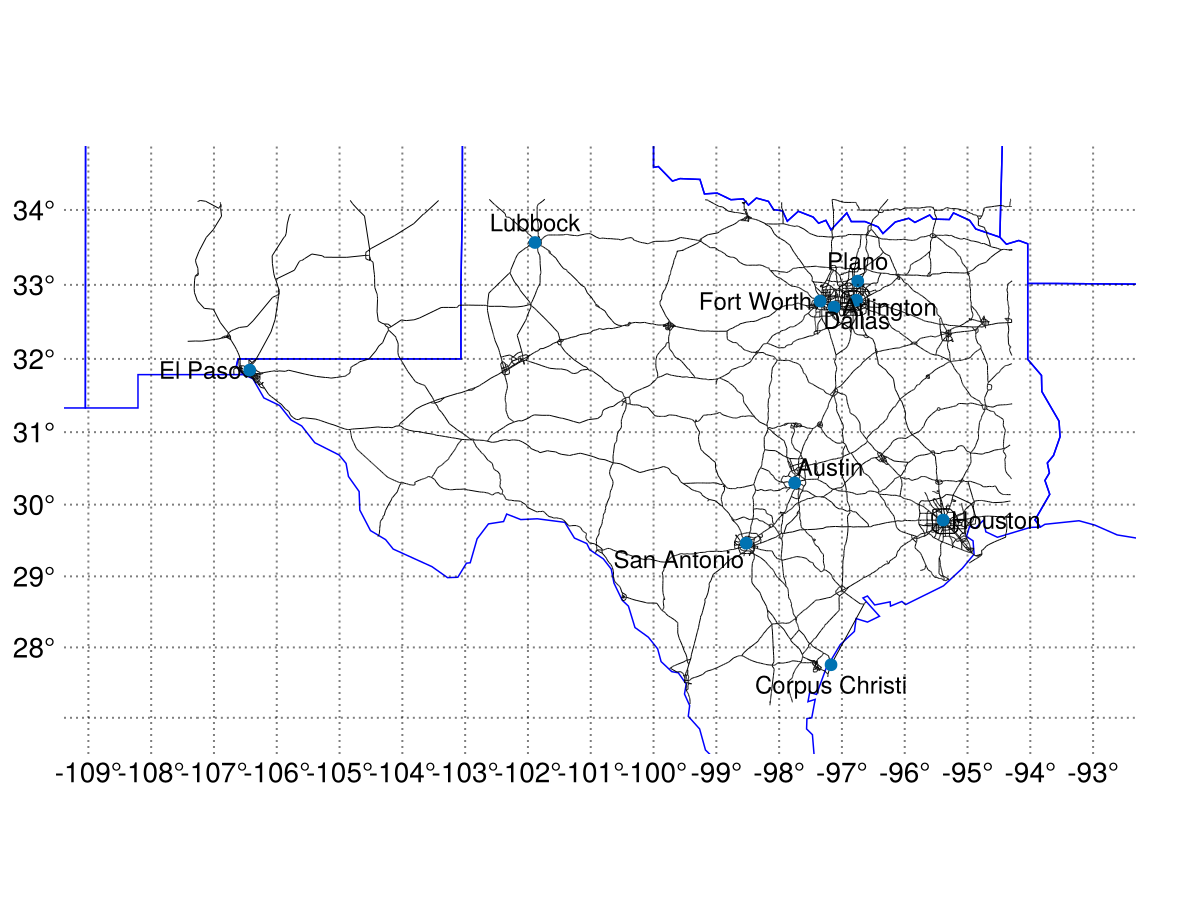

In [23]:
using CairoMakie, Logjam.MapTools

fig, ax = makemap(dfN.LON, dfN.LAT; xexpand=0.15)
lines!(ax, x2ln(g, dfN.LON), x2ln(g, dfN.LAT), color=:black, linewidth=.5)
scatter!(ax, df.LON, df.LAT)
text!(ax, df.LON, df.LAT, text=df.NAME; aligntext(df.LON, df.LAT)..., fontsize=12) 
fig

In [47]:
n = nrow(df)
D = hcat([dijkstra_shortest_paths(g, i).dists[1:n] for i in 1:n]...)

10×10 Matrix{Float64}:
   0.0     132.816   116.263    16.9174  …   14.4509  139.411   98.21
 132.816     0.0      19.5412  134.992      144.194   202.782   81.0455
 116.263    19.5412    0.0     118.44       127.641   214.328   62.9545
  16.9174  134.992   118.44      0.0         19.36    149.422   83.299
  67.853   133.231   133.693    78.0083      73.9081  112.846  116.307
  71.8229   92.6482   74.5571   56.9119  …   74.5521  204.614   28.8151
  81.9244   79.5903   61.4992   68.2141      85.8543  209.621   20.9838
  14.4509  144.194   127.641    19.36         0.0     131.984  100.939
 139.411   202.782   214.328   149.422      131.984     0.0    226.573
  98.21     81.0455   62.9545   83.299      100.939   226.573    0.0

Distance from Cary (1) to Charlotte (2):

In [48]:
D[1, 2]

132.81556429475137

In [49]:
dgc([df.LON[1], df.LAT[1]],[df.LON[2], df.LAT[2]]) * 1.2

143.86594537973932

Google Maps:

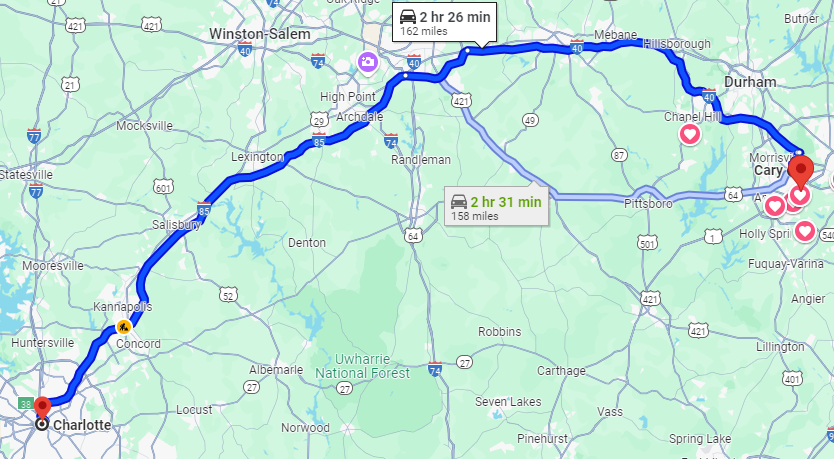

In [7]:
using DataFrames, Logjam.DataTools

function zcta5_2lonlat(zcta5, df)
    idx = findfirst(r -> r.ZCTA5 == zcta5, eachrow(df))
    if idx === nothing
        error("'$zcta5' not found in DataFrame")
    end
    return collect(df[idx, [:LON, :LAT]])
end

zcta5_2lonlat(36317, uszcta5())

2-element Vector{Float64}:
 -85.389501
  31.634584

In [11]:
z=[30669, 32606, 30733, 23830, 23061]
for i in z
    println(zcta5_2lonlat(i, uszcta5()))
end

[-83.118117, 33.676431]
[-82.444115, 29.682064]
[-85.050554, 34.414593]
[-77.397215, 37.024337]
[-76.537584, 37.427731]


In [12]:
z=[20002, 26149, 36317]
for i in z
    println(zcta5_2lonlat(i, uszcta5()))
end

[-76.983607, 38.905026]
[-80.88585, 39.472168]
[-85.389501, 31.634584]
